In [23]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


# Ballistic Conductor

In fact whole code we did in [[NEGF on a 1D Lattice- Implementation Foundation]], is applicable for here. 


### ✅ 1. **No Scattering Terms**

- Your Hamiltonian is **clean**: every site has the same on-site energy (`epsilon`), and identical hopping (`t`).
    
- There is **no random disorder** (`no Anderson localization`), **no phonons**, and **no voltage drop** across the wire.
    

This means the electrons **maintain phase coherence** across the device.

---

### ✅ 2. **Transmission $T(E)=1$ inside the band**

- For a clean 1D chain connected to identical leads, and with matched hopping:
    
    $$T(E) = 1 \quad \text{(for } E \in [-2t, +2t]$$ 
    
    That’s the **hallmark of perfect ballistic transmission** — every electron injected into the system comes out the other side.
    

---

### ✅ 3. **Current from Landauer Formula**

$$I = \frac{1}{2\pi} \int T(E) \left[ f_1(E) - f_2(E) \right] dE$$

If $T(E)=1$ over the entire energy window where $f_1 - f_2$​ is nonzero, then:

$$I = \frac{1}{2\pi} \int (f_1 - f_2) dE = \frac{1}{2\pi} (\mu_1 - \mu_2)$$


So the **conductance** becomes:

$$G = \frac{I}{\mu_1 - \mu_2} = \frac{1}{2\pi} \approx \frac{e^2}{h} \quad \text{(in real units)}$$



Which is the **quantum of conductance** per channel — **textbook ballistic transport**.

Current I = 0.031863 (in arbitrary units)


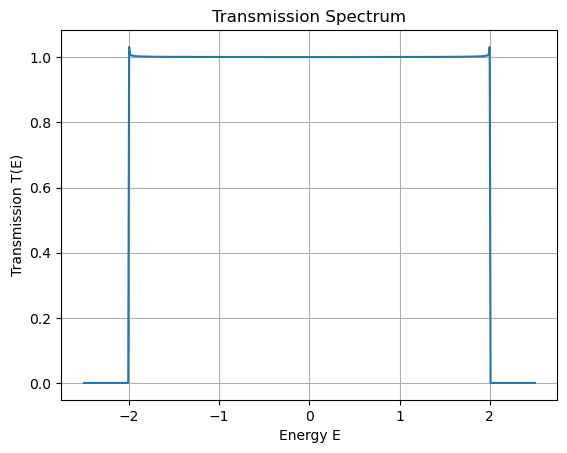

In [22]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# -----------------------
# PARAMETERS
# -----------------------
N = 100                # Number of sites in the device
t = 1.0              # Hopping term
epsilon = 0.0        # On-site energy
a = 1.0              # Lattice constant
eta = 1e-5           # Small imaginary term for numerical stability
kT = 0.025           # Thermal energy ~ 300K
mu1, mu2 = 0.1, -0.1 # Fermi levels for contacts

# -----------------------
# DEVICE HAMILTONIAN
# -----------------------
def create_hamiltonian(N, t, epsilon):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N):
        H[i, i] = epsilon
        if i > 0:
            H[i, i - 1] = -t
            H[i - 1, i] = -t
    return H

# -----------------------
# SELF-ENERGY + BROADENING
# -----------------------
def self_energy(E, t, epsilon):
    arg = (E - epsilon) / (2 * t)
    if np.abs(arg) > 1:
        # Outside propagating region, evanescent modes
        ka = np.arccosh(np.abs(arg)) * 1j * np.sign(arg)
    else:
        ka = np.arccos(arg)
    Sigma = t * np.exp(1j * ka)
    Gamma = 1j * (Sigma - np.conj(Sigma))
    return Sigma, Gamma

# -------------------------------------------------
# GREEN'S FUNCTION
# -------------------------------------------------
def green_function(E, H, Sigma1, Sigma2, eta=1e-5):
    H_eff = H.copy()
    H_eff[0, 0] += Sigma1
    H_eff[-1, -1] += Sigma2
    return np.linalg.inv((E + 1j * eta) * np.eye(H.shape[0]) - H_eff)

# -----------------------
# TRANSMISSION FUNCTION
# -----------------------
def transmission(E, H, t, epsilon):
    Sigma1, Gamma1_val = self_energy(E, t, epsilon)
    Sigma2, Gamma2_val = self_energy(E, t, epsilon)

    GR = green_function(E, H, Sigma1, Sigma2)
    GA = GR.conj().T

    Gamma1 = np.zeros_like(H, dtype=complex)
    Gamma2 = np.zeros_like(H, dtype=complex)
    Gamma1[0, 0] = Gamma1_val
    Gamma2[-1, -1] = Gamma2_val

    T = np.real(np.trace(Gamma1 @ GR @ Gamma2 @ GA))
    return T

# -----------------------
# FERMI FUNCTION
# -----------------------
def fermi(E, mu, kT):
    return 1.0 / (1.0 + np.exp((E - mu) / kT))

# -----------------------
# CURRENT CALCULATION
# -----------------------
def current(mu1, mu2, H, t, epsilon, kT):
    def integrand(E):
        T_E = transmission(E, H, t, epsilon)
        return T_E * (fermi(E, mu1, kT) - fermi(E, mu2, kT))
    
    I, _ = quad(integrand, -5, 5, limit=1000)
    return I / (2 * np.pi)

# -----------------------
# MAIN
# -----------------------
H = create_hamiltonian(N, t, epsilon)
I = current(mu1, mu2, H, t, epsilon, kT)
print(f"Current I = {I:.6f} (in arbitrary units)")

# -----------------------
# PLOT T(E)
# -----------------------
Es = np.linspace(-2.5 * t, 2.5 * t, 500)
Ts = [transmission(E, H, t, epsilon) for E in Es]

plt.plot(Es, Ts)
plt.xlabel("Energy E")
plt.ylabel("Transmission T(E)")
plt.title("Transmission Spectrum")
plt.grid(True)
plt.show()


Current I = 0.000148 (in arbitrary units)


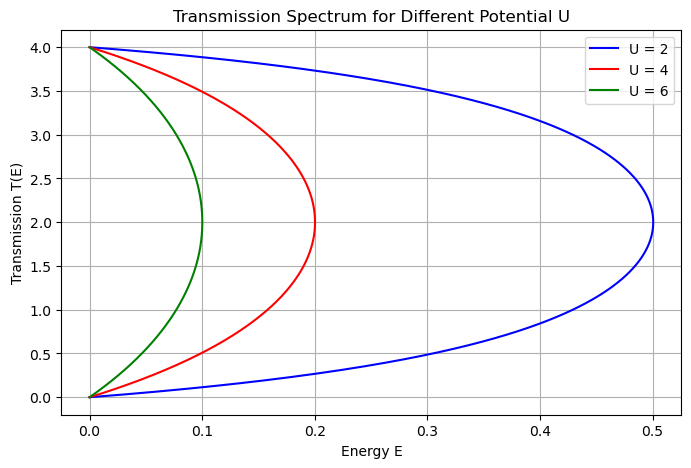

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# -----------------------
# PARAMETERS
# -----------------------
N = 100                # Number of sites in the device
t = 1.0              # Hopping term
epsilon = 2.0        # On-site energy
a = 1.0              # Lattice constant
U=3
eta = 1e-3           # Small imaginary term for numerical stability
kT = 0.025           # Thermal energy ~ 300K
mu1, mu2 = 0.1, -0.1 # Fermi levels for contacts

# -----------------------
# DEVICE HAMILTONIAN
# -----------------------
def create_hamiltonian(N, t, epsilon):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N):
        H[i, i] = epsilon
        if i > 0:
            H[i, i - 1] = -t
            H[i - 1, i] = -t
    return H

# -----------------------
# SELF-ENERGY + BROADENING
# -----------------------
def self_energy(E, t, epsilon):
    arg = (E - epsilon) / (2 * t)
    if np.abs(arg) > 1:
        # Outside propagating region, evanescent modes
        ka = np.arccosh(np.abs(arg)) * 1j * np.sign(arg)
    else:
        ka = np.arccos(arg)
    Sigma = t * np.exp(1j * ka)
    Gamma = 1j * (Sigma - np.conj(Sigma))
    return Sigma, Gamma

# -------------------------------------------------
# GREEN'S FUNCTION
# -------------------------------------------------
def green_function(E, H, Sigma1, Sigma2, eta=1e-5):
    H_eff = H.copy()
    H_eff[0, 0] += Sigma1
    H_eff[-1, -1] += Sigma2
    return np.linalg.inv((E + 1j * eta) * np.eye(H.shape[0]) - H_eff)

# -----------------------
# TRANSMISSION FUNCTION
# -----------------------
def transmission(E, H, t, epsilon):
    Sigma1, Gamma1_val = self_energy(E, t, epsilon)
    Sigma2, Gamma2_val = self_energy(E, t, epsilon)

    GR = green_function(E, H, Sigma1, Sigma2)
    GA = GR.conj().T

    Gamma1 = np.zeros_like(H, dtype=complex)
    Gamma2 = np.zeros_like(H, dtype=complex)
    Gamma1[0, 0] = Gamma1_val
    Gamma2[-1, -1] = Gamma2_val

    T = np.real(np.trace(Gamma1 @ GR @ Gamma2 @ GA))
    return T

# -----------------------
# FERMI FUNCTION
# -----------------------
def fermi(E, mu, kT):
    return 1.0 / (1.0 + np.exp((E - mu) / kT))

# -----------------------
# CURRENT CALCULATION
# -----------------------
def current(mu1, mu2, H, t, epsilon, kT):
    def integrand(E):
        T_E = transmission(E, H, t, epsilon)
        return T_E * (fermi(E, mu1, kT) - fermi(E, mu2, kT))
    
    I, _ = quad(integrand, -3*t, 3*t, limit=200)
    return I / (2 * np.pi)

def potential_adder(H,U,N):
    H[N-1,N-1]=U+epsilon
    return H
# -----------------------
# MAIN
# -----------------------
H1 = create_hamiltonian(N, t, epsilon)
H1=potential_adder(H1,5,50)
I = current(mu1, mu2, H1, t, epsilon, kT)
print(f"Current I = {I:.6f} (in arbitrary units)")

# -----------------------
# PLOT T(E)
# -----------------------
Us=[2,4,6]
colors=['b','r','g']
Es = np.linspace(0 * t, 4 * t, 500)
plt.figure(figsize=(8, 5))
for U, color in zip(Us, colors):
    H = create_hamiltonian(N, t, epsilon)
    H = potential_adder(H, U, 50)
    Ts = [transmission(E, H, t, epsilon) for E in Es]
    plt.plot(Ts, Es, color=color, label=f"U = {U}")

plt.xlabel("Energy E")
plt.ylabel("Transmission T(E)")
plt.title("Transmission Spectrum for Different Potential U")
plt.legend()
plt.grid(True)
plt.show()

Current I = 0.000148 (in arbitrary units)


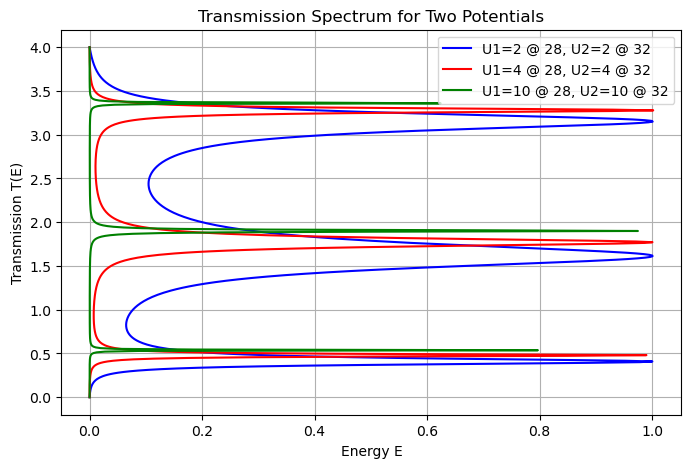

In [9]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# -----------------------
# PARAMETERS
# -----------------------
N = 100                # Number of sites in the device
t = 1.0              # Hopping term
epsilon = 2.0        # On-site energy
a = 1.0              # Lattice constant
U=3
eta = 1e-3           # Small imaginary term for numerical stability
kT = 0.025           # Thermal energy ~ 300K
mu1, mu2 = 0.1, -0.1 # Fermi levels for contacts

# -----------------------
# DEVICE HAMILTONIAN
# -----------------------
def create_hamiltonian(N, t, epsilon):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N):
        H[i, i] = epsilon
        if i > 0:
            H[i, i - 1] = -t
            H[i - 1, i] = -t
    return H

# -----------------------
# SELF-ENERGY + BROADENING
# -----------------------
def self_energy(E, t, epsilon):
    arg = (E - epsilon) / (2 * t)
    if np.abs(arg) > 1:
        # Outside propagating region, evanescent modes
        ka = np.arccosh(np.abs(arg)) * 1j * np.sign(arg)
    else:
        ka = np.arccos(arg)
    Sigma = t * np.exp(1j * ka)
    Gamma = 1j * (Sigma - np.conj(Sigma))
    return Sigma, Gamma

# -------------------------------------------------
# GREEN'S FUNCTION
# -------------------------------------------------
def green_function(E, H, Sigma1, Sigma2, eta=1e-5):
    H_eff = H.copy()
    H_eff[0, 0] += Sigma1
    H_eff[-1, -1] += Sigma2
    return np.linalg.inv((E + 1j * eta) * np.eye(H.shape[0]) - H_eff)

# -----------------------
# TRANSMISSION FUNCTION
# -----------------------
def transmission(E, H, t, epsilon):
    Sigma1, Gamma1_val = self_energy(E, t, epsilon)
    Sigma2, Gamma2_val = self_energy(E, t, epsilon)

    GR = green_function(E, H, Sigma1, Sigma2)
    GA = GR.conj().T

    Gamma1 = np.zeros_like(H, dtype=complex)
    Gamma2 = np.zeros_like(H, dtype=complex)
    Gamma1[0, 0] = Gamma1_val
    Gamma2[-1, -1] = Gamma2_val

    T = np.real(np.trace(Gamma1 @ GR @ Gamma2 @ GA))
    return T

# -----------------------
# FERMI FUNCTION
# -----------------------
def fermi(E, mu, kT):
    return 1.0 / (1.0 + np.exp((E - mu) / kT))

# -----------------------
# CURRENT CALCULATION
# -----------------------
def current(mu1, mu2, H, t, epsilon, kT):
    def integrand(E):
        T_E = transmission(E, H, t, epsilon)
        return T_E * (fermi(E, mu1, kT) - fermi(E, mu2, kT))
    
    I, _ = quad(integrand, -3*t, 3*t, limit=200)
    return I / (2 * np.pi)

def potential_adder_two(H, U1, n1, U2, n2, epsilon):
    H[n1-1, n1-1] = U1 + epsilon
    H[n2-1, n2-1] = U2 + epsilon
    return H

# -----------------------
# MAIN
# -----------------------
H1 = create_hamiltonian(N, t, epsilon)
H1=potential_adder(H1,5,50)
I = current(mu1, mu2, H1, t, epsilon, kT)
print(f"Current I = {I:.6f} (in arbitrary units)")

# -----------------------
# PLOT T(E)
# -----------------------
# Example usage:
Us1 = [2, 4, 10]
Us2 = [2, 4, 10]
n1 = 28
n2 = 32
colors = ['b', 'r', 'g']
Es = np.linspace(0 * t, 4 * t, 500)
plt.figure(figsize=(8, 5))
for U1, U2, color in zip(Us1, Us2, colors):
    H = create_hamiltonian(N, t, epsilon)
    H = potential_adder_two(H, U1, n1, U2, n2, epsilon)
    Ts = [transmission(E, H, t, epsilon) for E in Es]
    plt.plot(Ts, Es, color=color, label=f"U1={U1} @ {n1}, U2={U2} @ {n2}")

plt.xlabel("Energy E")
plt.ylabel("Transmission T(E)")
plt.title("Transmission Spectrum for Two Potentials")
plt.legend()
plt.grid(True)
plt.show()

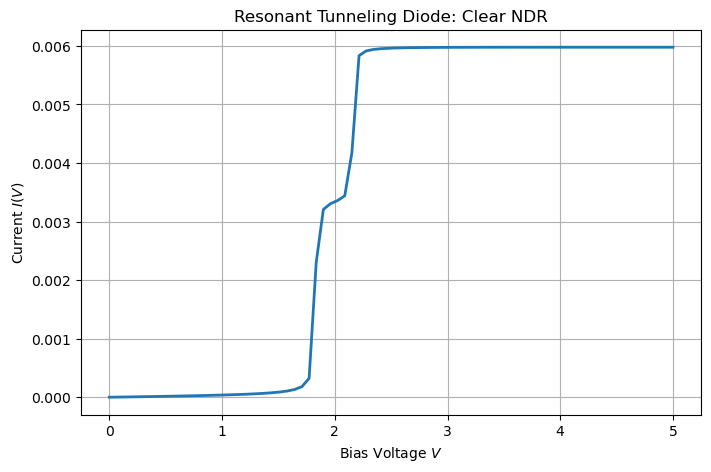

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

N = 30
t = 1.0
epsilon = 0.0
U = 12.0
well_width = 2
eta = 1e-5
kT = 1e-8  # very sharp Fermi edge

def create_rt_device(N, t, epsilon, U, well_width=2):
    H = np.zeros((N, N), dtype=complex)
    for i in range(N):
        # Barriers at both sides of the well
        if i == N//2 - well_width//2 - 1 or i == N//2 + well_width//2:
            H[i, i] = epsilon + U
        else:
            H[i, i] = epsilon
        if i > 0:
            H[i, i-1] = H[i-1, i] = -t
    return H

def self_energy(E, t, epsilon):
    arg = (E - epsilon) / (2 * t)
    if np.abs(arg) > 1:
        ka = np.arccosh(np.abs(arg)) * 1j * np.sign(arg)
    else:
        ka = np.arccos(arg)
    Sigma = t * np.exp(1j * ka)
    Gamma = 1j * (Sigma - np.conj(Sigma))
    return Sigma, Gamma

def green_function(E, H, Sigma1, Sigma2):
    H_eff = H.copy()
    H_eff[0, 0] += Sigma1
    H_eff[-1, -1] += Sigma2
    return np.linalg.inv((E + 1j * eta) * np.eye(H.shape[0]) - H_eff)

def transmission(E, H, t, epsilon):
    Sigma1, Gamma1_val = self_energy(E, t, epsilon)
    Sigma2, Gamma2_val = self_energy(E, t, epsilon)
    GR = green_function(E, H, Sigma1, Sigma2)
    GA = GR.conj().T
    Gamma1 = np.zeros_like(H)
    Gamma2 = np.zeros_like(H)
    Gamma1[0, 0] = Gamma1_val
    Gamma2[-1, -1] = Gamma2_val
    T = np.real(np.trace(Gamma1 @ GR @ Gamma2 @ GA))
    return T

def fermi(E, mu, kT):
    x = (E - mu) / kT
    with np.errstate(over='ignore'):
        return np.where(x > 100, 0.0,
                        np.where(x < -100, 1.0,
                                 1.0 / (1.0 + np.exp(x))))

def current(V, H, t, epsilon, kT):
    mu1 = V / 2
    mu2 = -V / 2
    def integrand(E):
        T_E = transmission(E, H, t, epsilon)
        return T_E * (fermi(E, mu1, kT) - fermi(E, mu2, kT))
    I, _ = quad(integrand, -3 * t, 3 * t, limit=100)
    return I / (2 * np.pi)

H = create_rt_device(N, t, epsilon, U, well_width)
Vs = np.linspace(0, 5, 80)
Is = [current(V, H, t, epsilon, kT) for V in Vs]

plt.figure(figsize=(8, 5))
plt.plot(Vs, Is, lw=2)
plt.xlabel("Bias Voltage $V$")
plt.ylabel("Current $I(V)$")
plt.title("Resonant Tunneling Diode: Clear NDR")
plt.grid(True)
plt.show()